In [56]:
import cv2
from matplotlib import pyplot as plt
import lane_detection

In [58]:
IP_ADDRESS = "192.168.1.102"

In [59]:
vcap = cv2.VideoCapture(f"rtsp://{IP_ADDRESS}:8554/rovcam")

img = None

MAX_RETRY = 100
count = 0
while count < MAX_RETRY:
    count += 1
    # Obtain the frame
    ret, frame = vcap.read()

    # Check frame was received successfully
    if ret:
        # got a frame, close the cap and return the frame
        print(" got a frame ")
        img = frame
        vcap.release()

vcap.release()

[tcp @ 0x3ed2b980] Connection to tcp://192.168.1.102:8554?timeout=0 failed: No route to host
[ERROR:0@3494.783] global cap.cpp:164 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.0) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): rtsp://192.168.1.102:8554/rovcam in function 'icvExtractPattern'




In [41]:
type(img)

numpy.ndarray

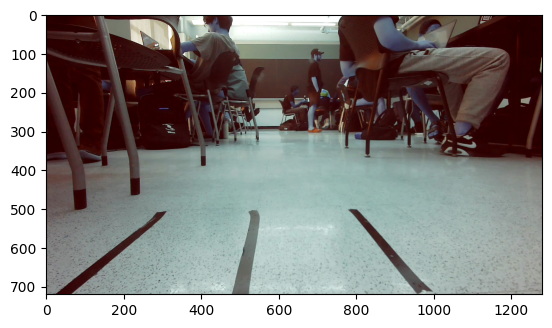

In [42]:
plt.imshow(img)

'edges = cv2.Canny(gray,0, 45, apertureSize=3) # detect edges\nlinelist = lane_detection.detect_lines(img, 0, 45, 3, 100, 10)\nnew_line_img = lane_detection.draw_lines(img,linelist)\nplt.imshow(cv2.cvtColor(new_line_img,cv2.COLOR_BGR2RGB))'

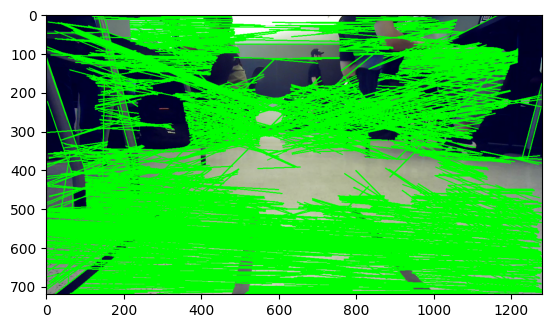

In [57]:
img0 = img.copy()
linelist = lane_detection.detect_lines(img0, 0, 45, 3, 100, 10)
new_line_img = lane_detection.draw_lines(img0,linelist)
plt.imshow(cv2.cvtColor(new_line_img,cv2.COLOR_BGR2RGB))
#slice, grayscale, blur, convert to black, and white, edges, lines, lanes
'''edges = cv2.Canny(gray,0, 45, apertureSize=3) # detect edges
linelist = lane_detection.detect_lines(img, 0, 45, 3, 100, 10)
new_line_img = lane_detection.draw_lines(img,linelist)
plt.imshow(cv2.cvtColor(new_line_img,cv2.COLOR_BGR2RGB))'''